<a href="https://colab.research.google.com/github/K-Hebel/WiDS_Chi/blob/master/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WiDS Competion - Data Exploration
by Karen H.

# Load Libraries and DataSets

In [3]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, Normalizer

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [6]:
#@title
!pip install dabl
import dabl

In [7]:
#@title
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"khebel","key":"943f549c80214c5869554b5d70607999"}'}

In [8]:
#@title
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list


mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    8MB  2021-02-20 10:04:07           1427  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           2341  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            259  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            165  
timoboz/superbowl-history-1967-2020                       

In [9]:
#@title
! kaggle competitions download -c 'widsdatathon2021'

SampleSubmissionWiDS2021.csv: Skipping, found more recently modified local copy (use --force to force download)
UnlabeledWiDS2021.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
TrainingWiDS2021.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
SolutionTemplateWiDS2021.csv: Skipping, found more recently modified local copy (use --force to force download)
DataDictionaryWiDS2021.csv: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
#@title
! unzip TrainingWiDS2021.csv.zip -d train

Archive:  TrainingWiDS2021.csv.zip
replace train/TrainingWiDS2021.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train/TrainingWiDS2021.csv  


In [11]:

#@title
data_dict=pd.read_csv("DataDictionaryWiDS2021.csv")
df=pd.read_csv("train/TrainingWiDS2021.csv")


# Preview of training dataset (df) and data dictionary (data_dict)

In [12]:
df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,1

In [206]:
data_dict

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient unit stay,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,demographic,age,Years,numeric,The age of the patient on unit admission,None
3,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admission,21.5
4,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospital for an elective surgical operation,0
5,demographic,ethnicity,None,string,The common national or cultural tradition which the person belongs to,Caucasian
6,demographic,gender,None,string,The genotypical sex of the patient,F
7,demographic,height,centimetres,numeric,The height of the person on unit admission,180
8,demographic,hospital_admit_source,None,string,The location of the patient prior to being admitted to the hospital,Home
9,demographic,icu_admit_source,None,string,The location of the patient prior to being admitted to the unit,Operating room


## Initial Categories to Drop Based on Being Patient Vitals Agnostic



In [14]:
drop_cat=['Unnamed: 0'	,'encounter_id','hospital_id','elective_surgery','icu_id',	'pre_icu_los_days',	'readmission_status',\
          'hospital_admit_source',	'icu_admit_source',	'icu_stay_type',	'icu_type']

df=df.drop(drop_cat, axis=1)

In [15]:
df.describe()

,age,bmi,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,125169.000000,125667.000000,128080.000000,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,25328.000000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,25350.000000,25350.00000,124638.000000,124638.000000,118827.000000,118827.000000,100454.000000,100454.000000,58751.000000,58751.000000,53422.000000,53422.000000,116423.000000,116423.000000,113465.000000,113465.000000,11

## Dictionary of  unique categories in data_dict and their corresponding df[column name]

In [16]:
#Category Columns in Data_Dictionary
cat_col =list(data_dict['Category'].unique())
cat_col

['identifier',
 'demographic',
 'APACHE covariate',
 'vitals',
 'labs',
 'labs blood gas',
 'APACHE comorbidity',
 'Target Variable']

Create dictionary of all of the unique categories in data_dict and their corresponding variable name (df column name)

In [17]:

cat_dict={}

for category in cat_col:
  cat_dict[category]= list(data_dict[data_dict['Category'].isin([category, 'Target Variable'])]['Variable Name'].values)


In [282]:
#Training dataframe (df) Column Categories
identifier= [col for col in cat_dict['identifier'] if col in df.columns]
demographic= [col for col in cat_dict['demographic'] if col in df.columns]
APACHE_covariate= [col for col in cat_dict['APACHE covariate'] if col in df.columns]
vitals= [col for col in cat_dict['vitals'] if col in df.columns]
labs= [col for col in cat_dict['labs'] if col in df.columns]
labs_blood_gas= [col for col in cat_dict['labs blood gas'] if col in df.columns]
APACHE_comorbidity= [col for col in cat_dict['APACHE comorbidity'] if col in df.columns]

In [283]:
demographic

['age', 'bmi', 'ethnicity', 'gender', 'height', 'weight', 'diabetes_mellitus']

In [205]:
len(set(labs+vitals))

113

#Stratified Random Sampling of DataSet to Balance Binary Target Variable Data

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 155 continuous features
Linear Discriminant Analysis training set score: 0.631


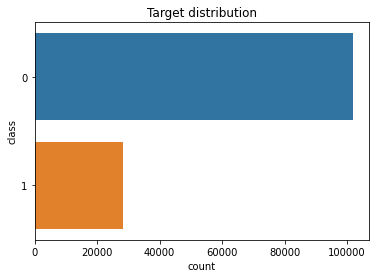

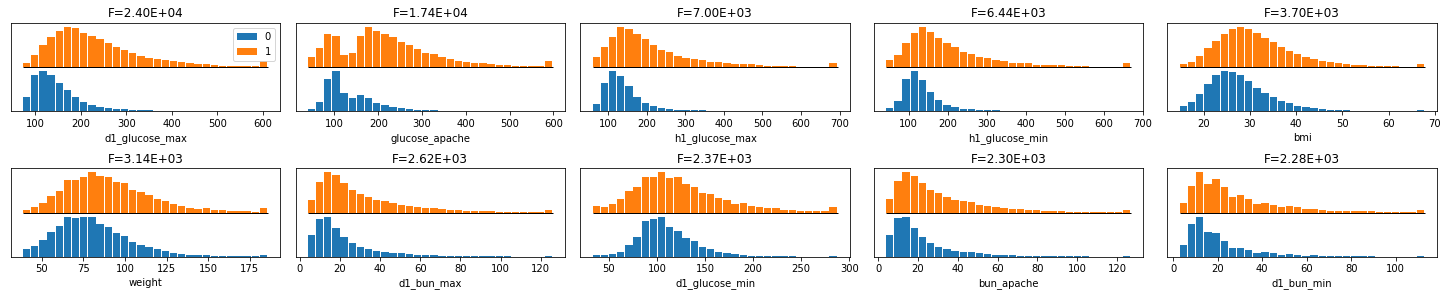

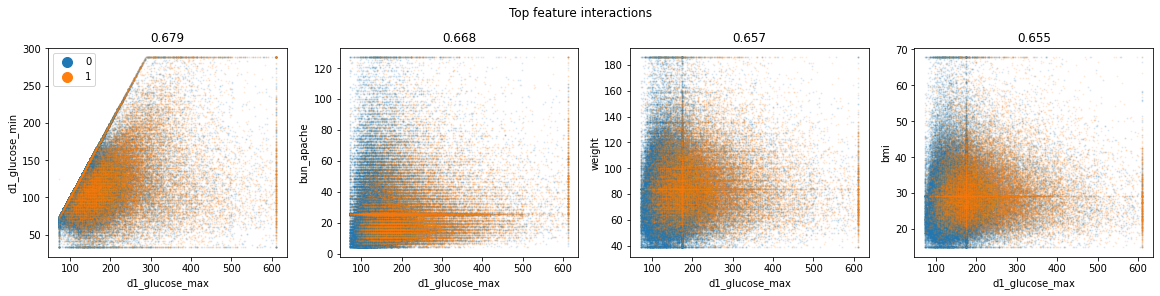

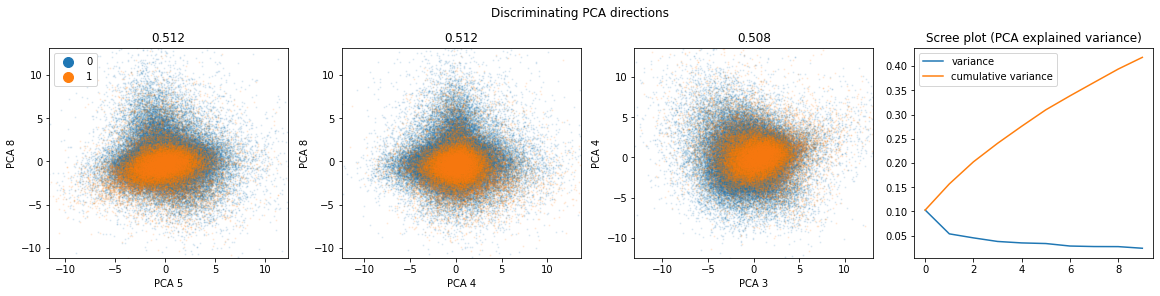

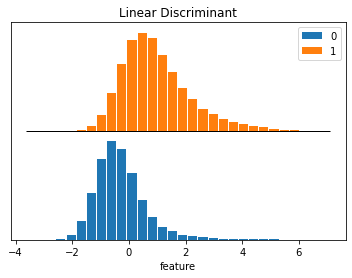

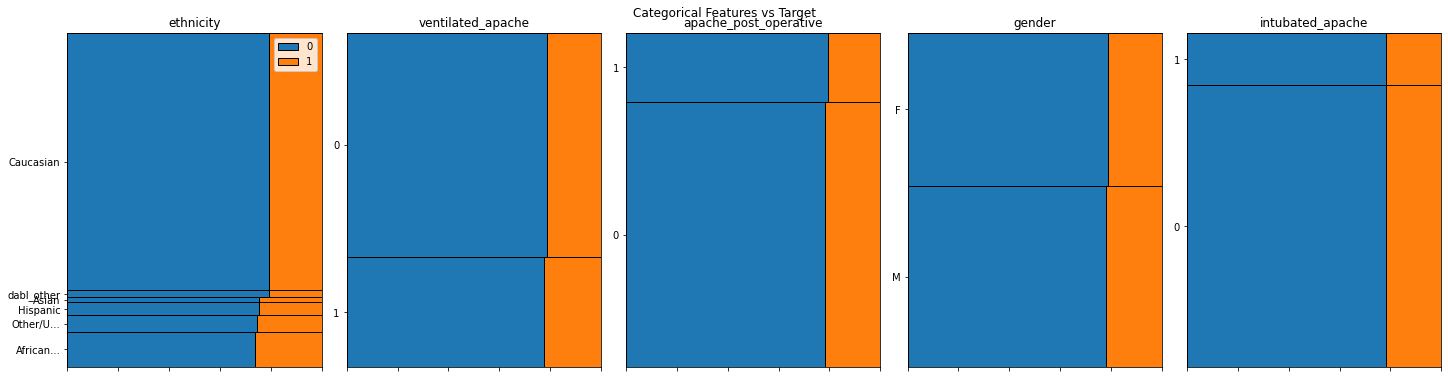

In [263]:
dabl.plot(df, target_col='diabetes_mellitus')

In [ ]:
df['diabetes_mellitus'].value_counts()

In [299]:
sample=df.groupby('diabetes_mellitus', group_keys=False).apply(lambda x: x.sample(25000))
sample.describe()

,age,bmi,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,48340.000000,48314.000000,49266.000000,48707.000000,20257.000000,49450.000000,49759.000000,50000.000000,50000.000000,18445.000000,40828.000000,41042.000000,11759.000000,49321.000000,49321.000000,49794.000000,49321.000000,45821.000000,49912.000000,39839.000000,50000.000000,49869.000000,11759.000000,11759.000000,11759.000000,11759.000000,49705.000000,41163.000000,47563.000000,25129.000000,50000.000000,38835.000000,13430.000000,13430.000000,49904.000000,49904.000000,49319.000000,49319.000000,49922.000000,49922.000000,13498.000000,13498.000000,49892.000000,49892.000000,49063.000000,49063.000000,49738.000000,49738.000000,49803.000000,49803.000000,13448.000000,13448.000000,49906.000000,49906.000000,49324.000000,49324.000000,48296.000000,48296.000000,9646.00000,9646.000000,47908.000000,47908.000000,45590.000000,45590.000000,48485.000000,48485.000000,9668.000000,9668.000000,47535.000000,47535.000000,44834.000000,44834.000000,47609.000000,47609.000000,47636.000000,47636.000000,9657.000000,9657.000000,47912.000000,47912.000000,45596.000000,45596.000000,38677.000000,38677.00000,22947.000000,22947.000000,20738.000000,20738.000000,45226.000000,45226.000000,44165.000000,44165.000000,45409.000000,45409.000000,47710.000000,47710.000000,42639.000000,42639.00000

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 155 continuous features
Linear Discriminant Analysis training set score: 0.735


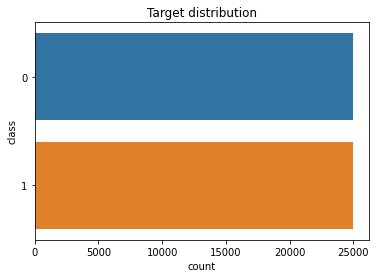

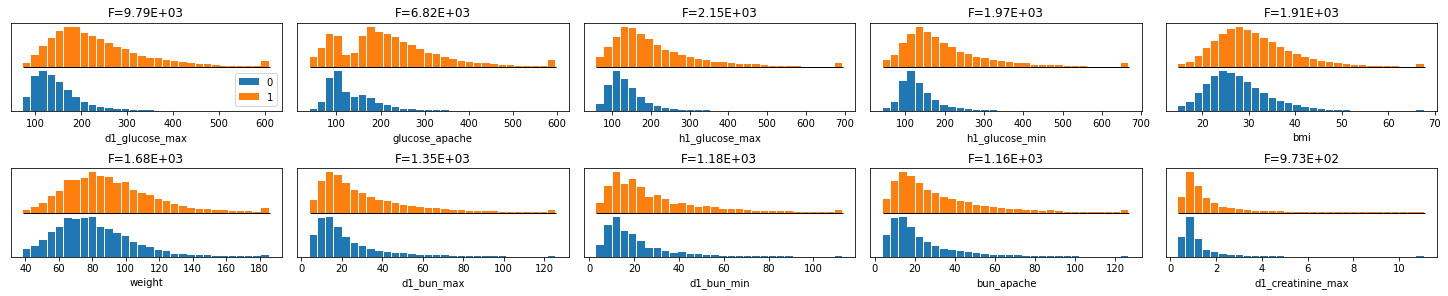

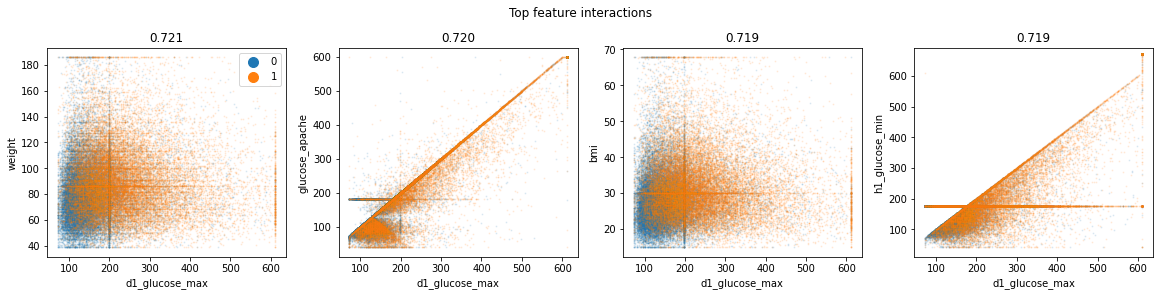

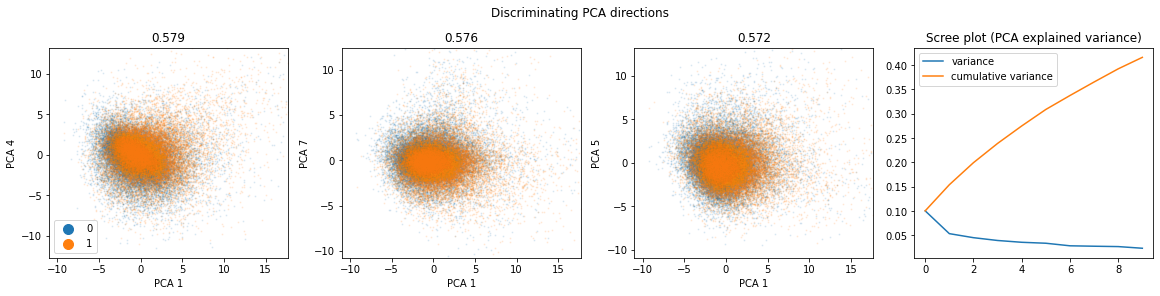

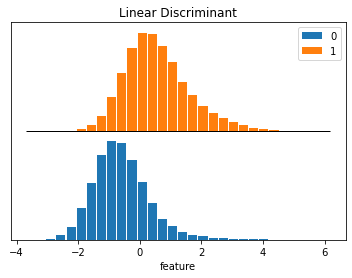

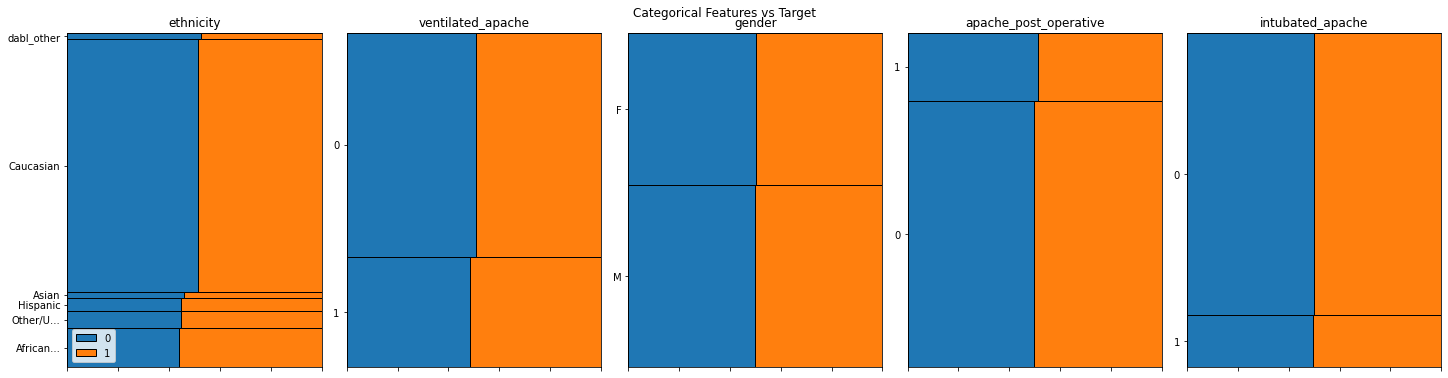

In [265]:
dabl.plot(sample, target_col='diabetes_mellitus')

# Analysis of 'lab', 'vitals', 'lab blood gas' dataset categories for first hour (h1) and first 24_hours (d1) in ICU

##Separate labs between 1_hour (h1) labs and 24_hour (d1) labs


In [266]:
day_labs=['diabetes_mellitus']
hour_labs=['diabetes_mellitus']
for column in sample.columns:
  if column.split('_')[0]=='d1':
    day_labs.append(column)
  elif column.split('_')[0]=='h1':
    hour_labs.append(column)

##Normalize laboratory test data (h1, d1) using MinMaxScaler()

In [267]:
#Normalize witn MaxMinScaler Dataframe based on labs in first 24 hours  in ICU

min_max_scaler = MinMaxScaler()

norm_day_labs = pd.DataFrame( min_max_scaler.fit_transform(sample[day_labs].values))
norm_day_labs.columns = sample[day_labs].columns
norm_day_labs.describe()


,diabetes_mellitus,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min
count,50000.000000,13440.000000,13440.000000,49900.000000,49900.000000,49362.000000,49362.000000,49907.000000,49907.000000,13511.000000,13511.000000,49885.000000,49885.000000,49125.000000,49125.000000,49737.000000,49737.000000,49815.000000,49815.000000,13457.000000,13457.000000,49902.000000,49902.000000,49366.000000,49366.000000,48237.000000,48237.000000,22914.000000,22914.000000,20699.000000,20699.000000,45204.000000,45204.000000,44133.000000,44133.000000,45395.000000,45395.000000,47663.000000,47663.000000,42620.000000,42620.000000,43882.000000,43882.000000,44094.000000,44094.000000,18804.000000,18804.000000,13544.000000,13544.000000,42991.000000,42991.000000,45693.000000,45693.000000,45375.000000,45375.000000,43411.000000,43411.000000,17834.000000,17834.000000,17684.000000,17684.000000,18007.000000,18007.000000,14366.000000,14366.000000
mean,0.500000,0.287399,0.490689,0.357234,0.473828,0.358709,0.474725,0.377125,0.403248,0.270186,0.509712,0.359801,0.469518,0.368460,0.470078,0.188981,0.175415,0.992924,0.904694,0.371763,0.517654,0.420133,0.472041,0.419623,0.472164,0.457775,0.740479,0.513510,0.522587,0.017866,0.016491,0.194376,0.202827,0.479552,0.558135,0.119423,0.122036,0.233638,0.334006,0.443811,0.500375,0.437664,0.483448,0.446236,0.489888,0.099398,0.108840,0.129195,0.113394,0.323372,0.330367,0.357088,0.454469,0.460200,0.569873,0.252684,0.260767,0.290168,0.332794,0.587345,0.644904,0.245667,0.174598,0.296126,0.327694
std,0.500005,0.150158,0.149398,0.171713,0.172443,0.171555,0.172775,0.182547,0.097342,0.177795,0.151451,0.170805,0.171319,0.173910,0.171631,0.136089,0.070115,0.017062,0.099077,0.142870,0.152810,0.185066,0.175940,0.185261,0.176177,0.146090,0.128987,0.196022,0.196701,0.039347,0.037183,0.176321,0.177954,0.160313,0.163569,0.152024,0.149516,0.184849,0.168385,0.158240,0.163956,0.205302,0.202449,0.197908,0.198158,0.138102,0.141673,0.156070,0.138290,0.161482,0.164036,0.164133,0.174210,0.138158,0.137231,0.149659,0.146928,0.157236,0.156251,0.152790,0.167986,0.209465,0.144309,0.167042,0.209601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.187500,0.404762,0.243697,0.363636,0.243697,0.363636,0.243697,0.342857,0.176056,0.444444,0.241935,0.355556,0.247934,0.355556,0.102564,0.138889,0.990000,0.890000,0.281250,0.432099,0.288732,0.352941,0.288732,0.352778,0.375000,0.712401,0.382353,0.382353,0.003937,0.003937,0

In [268]:
#Normalize witn MaxMinScaler Dataframe based on labs in first 1 hour in ICU

norm_hour_labs = pd.DataFrame( min_max_scaler.fit_transform(sample[hour_labs].values))
norm_hour_labs.columns = sample[hour_labs].columns
norm_hour_labs.describe()

,diabetes_mellitus,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min
count,50000.000000,9671.000000,9671.000000,47887.000000,47887.000000,45630.000000,45630.000000,48443.000000,48443.000000,9698.000000,9698.000000,47515.000000,47515.000000,44881.000000,44881.000000,47528.000000,47528.000000,47632.000000,47632.000000,9680.000000,9680.000000,47891.000000,47891.000000,45635.000000,45635.000000,38520.000000,38520.000000,4447.000000,4447.000000,4073.000000,4073.000000,10314.000000,10314.000000,9966.000000,9966.000000,10384.000000,10384.000000,23676.000000,23676.000000,9651.000000,9651.000000,10545.000000,10545.000000,10471.000000,10471.000000,18804.000000,18804.000000,4632.000000,4632.000000,9429.000000,9429.000000,11980.000000,11980.000000,11556.000000,11556.000000,9330.000000,9330.000000,8802.000000,8802.000000,8709.000000,8709.000000,8877.000000,8877.000000,6558.000000,6558.000000
mean,0.500000,0.338609,0.431965,0.358472,0.438377,0.360191,0.438209,0.392375,0.442318,0.227470,0.507861,0.364516,0.439785,0.371219,0.442625,0.256188,0.090392,0.981401,0.952766,0.407185,0.500398,0.400205,0.450459,0.399220,0.448694,0.544432,0.580127,0.532018,0.531607,0.022473,0.022444,0.181385,0.181232,0.468751,0.500760,0.117159,0.117331,0.203912,0.216488,0.492092,0.490439,0.491539,0.489967,0.492234,0.491813,0.099398,0.108840,0.150569,0.148116,0.310910,0.309607,0.369693,0.368488,0.556841,0.550471,0.287038,0.285924,0.305584,0.306830,0.632279,0.640931,0.249684,0.228896,0.298171,0.320324
std,0.500005,0.158267,0.165652,0.176015,0.178650,0.175315,0.177497,0.183150,0.186029,0.121573,0.145760,0.177620,0.178836,0.180889,0.179977,0.151783,0.031335,0.029392,0.063585,0.163185,0.169787,0.188888,0.190113,0.189790,0.189573,0.127107,0.124550,0.199942,0.200140,0.051263,0.051225,0.171879,0.171826,0.151202,0.147169,0.149233,0.149504,0.170817,0.162444,0.165594,0.165791,0.189154,0.191618,0.188789,0.191505,0.138102,0.141673,0.167280,0.165416,0.164389,0.164594,0.167128,0.168837,0.133303,0.131922,0.160442,0.160056,0.151958,0.152146,0.169437,0.167504,0.218634,0.202066,0.195371,0.209458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.235294,0.317647,0.235849,0.318681,0.233645,0.315217,0.262712,0.305556,0.164403,0.416667,0.241379,0.311321,0.245614,0.320755,0.163265,0.074074,0.970000,0.940000,0.298343,0.381604,0.263514,0.319149,0.263514,0.316901,0.491803,0.531250,0.388889,0.388889,0.004975,0.004975,0.076336,0.076336,0.379310,0.

##Drop lab columns where count is < 20% of sample index count (50,000)

In [269]:
sample['h1_arterial_ph_min'].count()/sample.count()[-1]

0.17418

In [270]:
#List of all lab column names
all_lab_columns=list(norm_hour_labs.columns)
for col in list(norm_day_labs.columns):
  all_lab_columns.append(col)

In [271]:
labs_under_20per =[]

for col in all_lab_columns:
  if sample[col].count()/sample.count()[-1]< .2:
    labs_under_20per.append(col)

In [272]:
labs_under_20per

['h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_lactate_max',
 'h1_lactate_min',
 'h1_platelets_max',
 'h1_platelets_min',
 'h1_wbc_max',
 'h1_wbc_min',
 'h1_arterial_pco2_max',
 'h1_arterial_pco2_min',
 'h1_arterial_ph_max',
 'h1_arterial_ph_min',
 'h1_arterial_po2_max',
 'h1_arterial_po2_min',
 'h1_pao2fio2ratio_max',
 'h1_pao2fio2ratio_min']

In [273]:
for col in labs_under_20per:
  norm_hour_labs=norm_hour_labs.drop(col, axis=1)

norm_hour_labs.describe()

,diabetes_mellitus,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min
count,50000.000000,47887.000000,47887.000000,45630.000000,45630.000000,48443.000000,48443.000000,47515.000000,47515.000000,44881.000000,44881.000000,47528.000000,47528.000000,47632.000000,47632.000000,47891.000000,47891.000000,45635.000000,45635.000000,38520.000000,38520.000000,10314.000000,10314.000000,10384.000000,10384.000000,23676.000000,23676.000000,10545.000000,10545.000000,10471.000000,10471.000000,18804.000000,18804.000000,11980.000000,11980.000000,11556.000000,11556.000000
mean,0.500000,0.358472,0.438377,0.360191,0.438209,0.392375,0.442318,0.364516,0.439785,0.371219,0.442625,0.256188,0.090392,0.981401,0.952766,0.400205,0.450459,0.399220,0.448694,0.544432,0.580127,0.181385,0.181232,0.117159,0.117331,0.203912,0.216488,0.491539,0.489967,0.492234,0.491813,0.099398,0.108840,0.369693,0.368488,0.556841,0.550471
std,0.500005,0.176015,0.178650,0.175315,0.177497,0.183150,0.186029,0.177620,0.178836,0.180889,0.179977,0.151783,0.031335,0.029392,0.063585,0.188888,0.190113,0.189790,0.189573,0.127107,0.124550,0.171879,0.171826,0.149233,0.149504,0.170817,0.162444,0.189154,0.191618,0.188789,0.191505,0.138102,0.141673,0.167128,0.168837,0.133303,0.131922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.235849,0.318681,0.233645,0.315217,0.262712,0.305556,0.241379,0.311321,0.245614,0.320755,0.163265,0.074074,0.970000,0.940000,0.263514,0.319149,0.263514,0.316901,0.491803,0.531250,0.076336,0.076336,0.041688,0.041811,0.092761,0.113057,0.357724,0.349593,0.361345,0.355556,0.029172,0.038263,0.255319,0.260870,0.488372,0.488372
50%,0.500000,0.339623,0.428571,0.345794,0.423913,0.372881,0.425926,0.344828,0.424528,0.350877,0.433962,0.224490,0.084656,0.990000,0.960000,0.378378,0.439716,0.378378,0.436620,0.540984,0.593750,0.122137,0.122137,0.067411,0.066720,0.150933,0.167197,0.487805,0.487805,0.487395,0.486111,0.058343,0.057394,0.340426,0.347826,0.558140,0.558140
75%,1.000000,0.462264,0.549451,0.467290,0.554348,0.508475,0.564815,0.465517,0.556604,0.473684,0.556604,0.326531,0.105820,1.000000,0.990000,0.513514,0.574468,0.513514,0.570423,0.606557,0.640625,0.229008,0.229008,0.121516,0.121875,0.254699,0.267516,0.617886,0.617886,0.621849,0.625000,0.102100,0.114789,0.446809,0.456522,0.627907,0.627907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##EDA of Lab features within the first hour (h1) and 24 hours (d1)

Target looks like classification
Showing only top 10 of 36 continuous features
Linear Discriminant Analysis training set score: 0.604


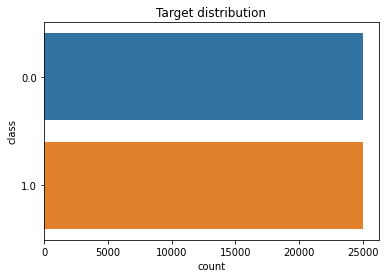

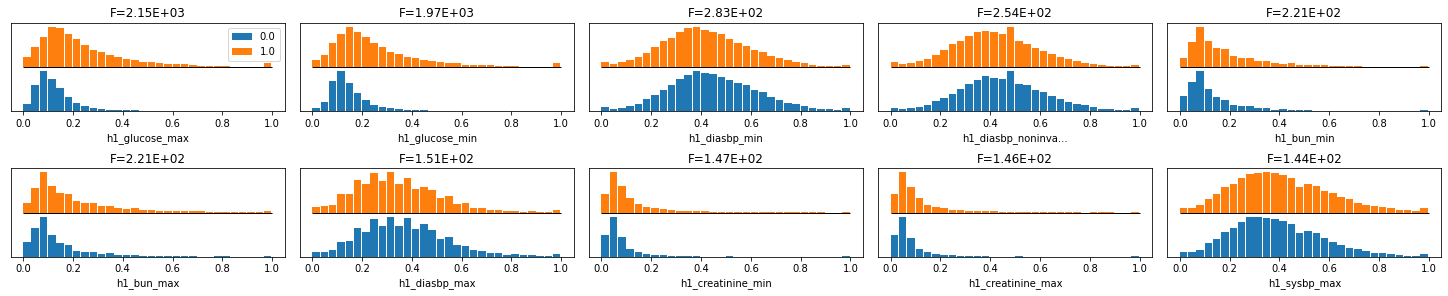

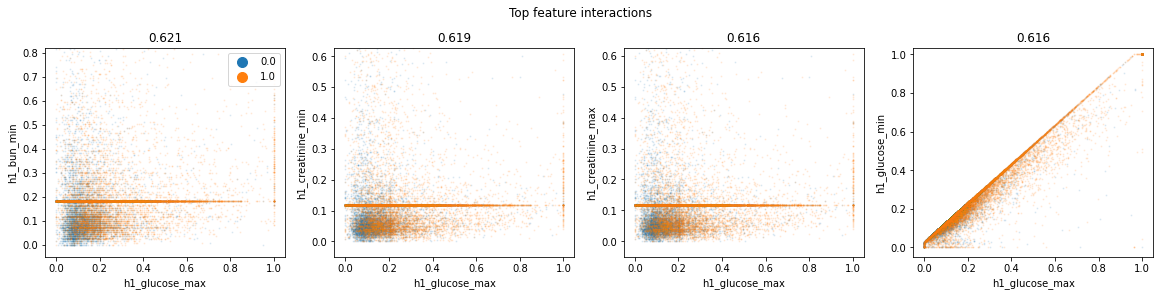

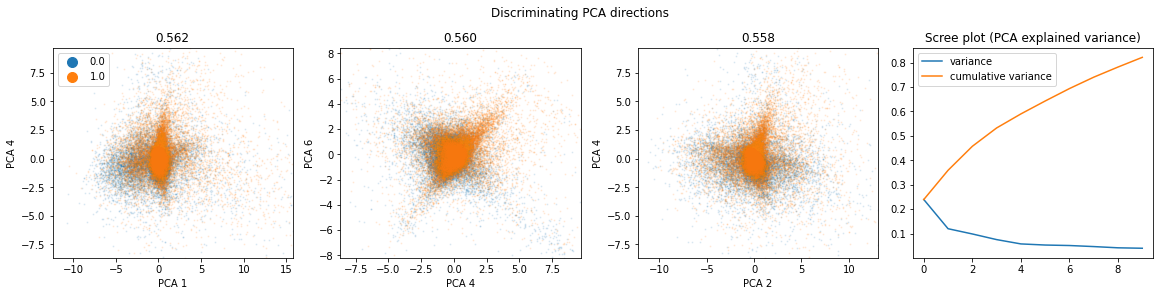

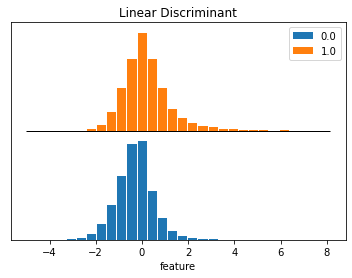

In [274]:
dabl.plot(norm_hour_labs, target_col='diabetes_mellitus')

Target looks like classification
Showing only top 10 of 64 continuous features
Linear Discriminant Analysis training set score: 0.715


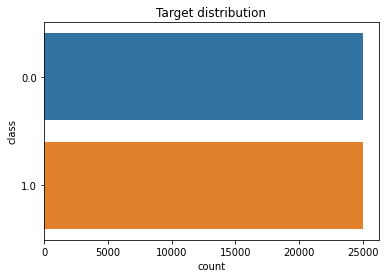

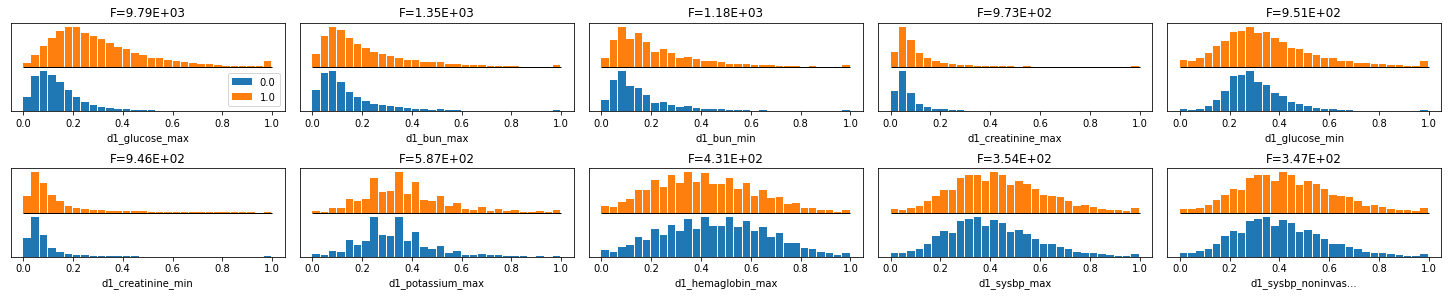

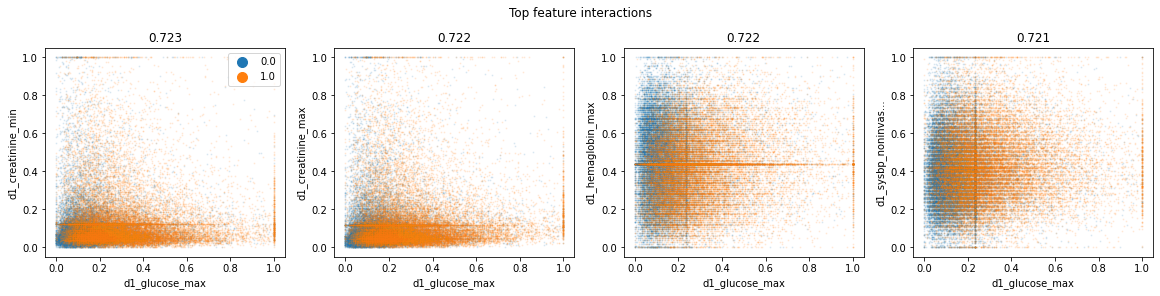

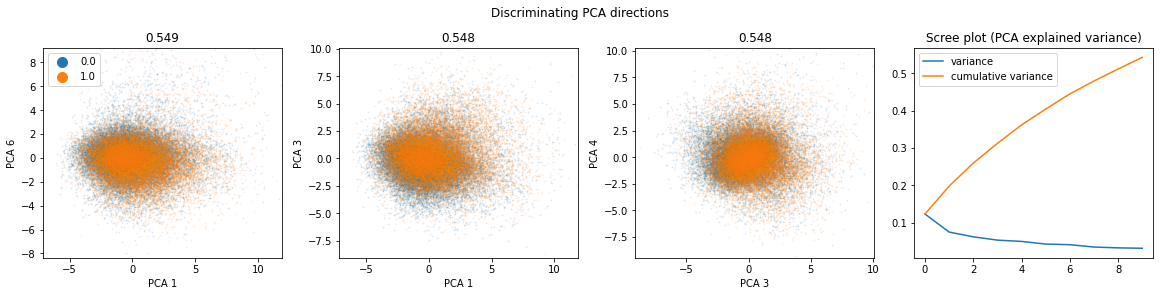

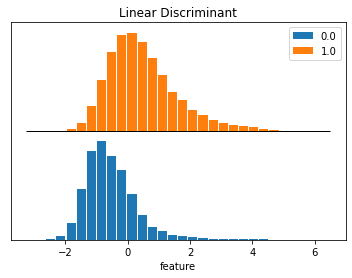

In [275]:
dabl.plot(norm_day_labs, target_col='diabetes_mellitus')

##Visualizations of Correlation for h1 and d1 labs



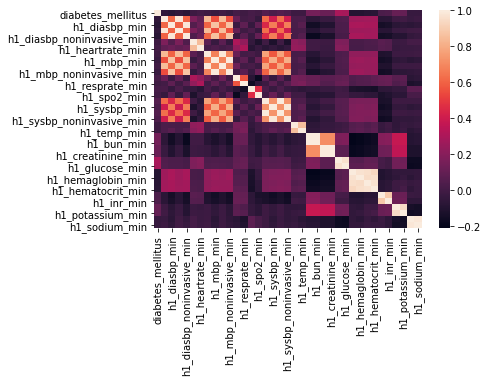

In [276]:
#Correleation for 1 hour labs
sns.heatmap(norm_hour_labs.corr());

In [320]:
norm_hour_labs.columns

Index(['diabetes_mellitus', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'h1_temp_max', 'h1_temp_min', 'h1_bun_max', 'h1_bun_min',
       'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max',
       'h1_glucose_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min',
       'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min',
       'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max',
       'h1_sodium_min'],
      dtype='object')

##Drop from Sample data labels that show little to no correlation to target variable

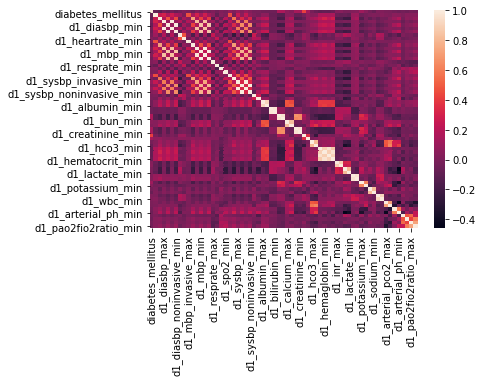

In [277]:
#Correleation for 24 hour (d1) labs
sns.heatmap(norm_day_labs.corr());

##Drop Labs with input data count under 20% of total sample count of 50,000

In [300]:
for col in labs_under_20per:
  sample = sample.drop(col,axis=1)

In [301]:
sample.shape

(50000, 142)

# Analysis of Demographic Data

In [284]:
demo = sample[demographic]

In [ ]:
demo.ethnicity.value_counts()/demo.ethnicity.count(),demo.ethnicity.value_counts()


In [ ]:
demo.gender.value_counts()/demo.gender.count(), demo.gender.value_counts()

##Demographic Heatmap

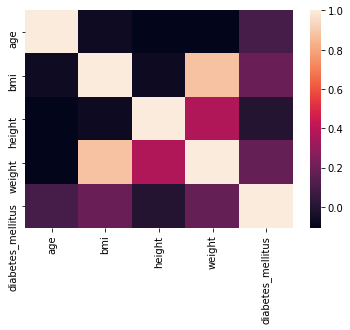

In [285]:
#Correleation for demographic data
sns.heatmap(sample[demographic].corr());

Drop height from the dataset as there is no corrolation

In [286]:
demographic.remove('height')

In [302]:
sample =sample.drop('height', axis=1)

##Encode categorical demographic data (ethincity, gender)

In [288]:
demo_cat=pd.get_dummies(sample[['gender','ethnicity']])

demo_cat.describe()

,gender_F,gender_M,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,0.455660,0.543960,0.116080,0.017840,0.75534,0.040280,0.008040,0.051300
std,0.498035,0.498069,0.320324,0.132371,0.42989,0.196617,0.089306,0.220611
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [289]:
demographic=demographic+list(demo_cat.columns)
demographic.remove('gender')
demographic.remove('ethnicity')

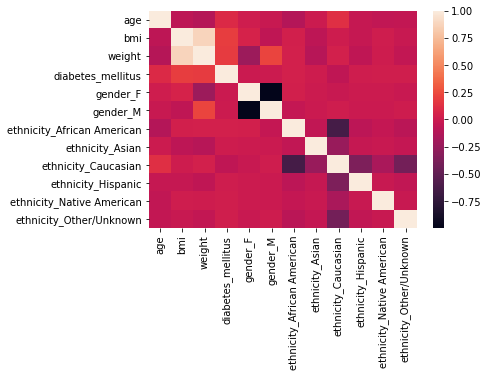

In [294]:
#Correleation for demographic data
adj_heat=sns.heatmap(sample[demographic].corr());
adj_heat

##Ethnicity and Gender do not appear to have a strong correlation to Target Variable - so drop from sample dataset

In [303]:
sample=sample.drop(['ethnicity'], axis =1)

In [304]:
sample=sample.drop(['gender'], axis =1)

In [305]:
sample.describe()

,age,bmi,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,48340.000000,48314.000000,48707.000000,20257.000000,49450.000000,49759.000000,50000.000000,50000.000000,18445.000000,40828.000000,41042.000000,11759.000000,49321.000000,49321.000000,49794.000000,49321.000000,45821.000000,49912.000000,39839.000000,50000.000000,49869.000000,11759.000000,11759.000000,11759.000000,11759.000000,49705.000000,41163.000000,47563.000000,25129.000000,50000.000000,38835.000000,13430.000000,13430.000000,49904.000000,49904.000000,49319.000000,49319.000000,49922.000000,49922.000000,13498.000000,13498.000000,49892.000000,49892.000000,49063.000000,49063.000000,49738.000000,49738.000000,49803.000000,49803.000000,13448.000000,13448.000000,49906.000000,49906.000000,49324.000000,49324.000000,48296.000000,48296.000000,47908.000000,47908.000000,45590.000000,45590.000000,48485.000000,48485.000000,47535.000000,47535.000000,44834.000000,44834.000000,47609.000000,47609.000000,47636.000000,47636.000000,47912.000000,47912.000000,45596.000000,45596.000000,38677.000000,38677.00000,22947.000000,22947.000000,20738.000000,20738.000000,45226.000000,45226.000000,44165.000000,44165.000000,45409.000000,45409.000000,47710.000000,47710.000000,42639.000000,42639.000000,43903.000000,43903.000000,44131.000000,44131.000000,18756.000000,18756.000000,13693.000000,13693.000000,43041.000000,43041.000000,45726.000000,45726.000000,45400.000000,45400.000000,43445.000000,43445.000000,10218.000000,10218.000000,10316.000000,10316.000000,23627.000000,23627.000000,10614.000000,10614.000000,10548.000000,10548.000000,18756.000000,18756.000000,11911.000000,11911.000000,11492.000000,11492.000000,17772.000000,17772.000000,17633.000000,17633.000000,17968.000000,17968.000000,14313.000000,14313.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,

##Normalize demographic - age, weight, bmi using MaxMinScaler

##Adjusted Demographic HeatMap

##Demographic EDA Visualization


#Analysis of APACHE_covariate Data

##APACHE_covariate Heatmaps and description

,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,diabetes_mellitus
count,20257.000000,49450.000000,49759.000000,50000.000000,50000.000000,18445.000000,40828.000000,41042.000000,11759.000000,49321.000000,49321.000000,49794.000000,49321.000000,45821.000000,49912.000000,39839.000000,50000.000000,49869.000000,11759.000000,11759.000000,11759.000000,11759.000000,49705.000000,41163.000000,47563.000000,25129.000000,50000.000000,38835.000000,50000.000000
mean,2.873278,185.716744,562.958608,0.202900,0.039880,1.126392,27.728789,1.604809,0.593093,3.505322,5.508323,0.009499,4.051276,181.972910,99.418697,32.686993,0.154220,87.466836,42.126252,42.126252,129.444400,7.351794,25.130695,137.784253,36.412926,1817.054984,0.331120,12.219141,0.500000
std,0.680354,86.426126,460.892555,0.402163,0.195679,2.166521,21.583867,1.640050,0.264196,0.923590,1.239284,0.097000,1.523414,103.698381,30.407157,6.731639,0.361163,42.260112,12.271269,12.271269,82.378289,0.098550,15.055563,5.303500,0.857963,1472.407460,0.470621,6.888822,0.500005
min,1.200000,101.000000,0.010000,0.000000,0.000000,0.100000,4.000000,0.300000,0.210000,1.000000,1.000000,0.000000,1.000000,39.000000,30.000000,16.200000,0.000000,40.000000,18.000000,18.000000,31.000000,6.960540,4.000000,117.000000,32.100000,0.000000,0.000000,0.900000,0.000000
25%,2.400000,113.000000,203.010000,0.000000,0.000000,0.400000,13.000000,0.740000,0.400000,3.000000,6.000000,0.000000,4.000000,101.000000,86.000000,27.800000,0.000000,53.000000,34.400000,34.400000,77.000000,7.300500,11.000000,135.000000,36.200000,799.459200,0.000000,7.600000,0.000000
50%,2.900000,123.000000,410.010000,0.000000,0.000000,0.600000,20.000000,1.050000,0.500000,4.000000,6.000000,0.000000,5.000000,161.000000,103.000000,32.800000,0.000000,66.000000,40.000000,40.000000,102.000000,7.360000,27.000000,138.000000,36.500000,1464.739200,0.000000,10.500000,0.500000
75%,3.300000,302.000000,703.030000,0.000000,0.000000,1.100000,35.000000,1.700000,0.800000,4.000000,6.000000,0.000000,5.000000,231.000000,119.000000,37.400000,0.000000,125.000000,47.000000,47.000000,152.000000,7.413000,36.000000,141.000000,36.700000,2444.774400,1.000000,15.300000,1.000000
max,4.600000,308.000000,2201.050000,1.000000,1.000000,60.200000,127.000000,11.180000,1.000000,4.000000,6.000000,1.000000,5.000000,598.700000,178.000000,51.400000,1.000000,200.000000,95.000000,95.000000,498.000000,7.590000,60.000000,158.000000,39.700000,8716.669632,1.000000,45.800000,1.000000


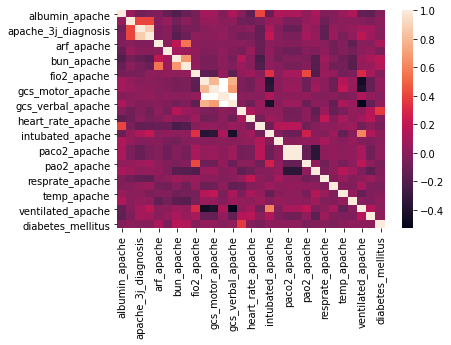

In [308]:
#Correleation for APACHE_covariate category    
sns.heatmap(sample[APACHE_covariate ].corr());
sample[APACHE_covariate ].describe()

##Normalize APACHE_covariate data

In [309]:
norm_covariate = pd.DataFrame( min_max_scaler.fit_transform(sample[APACHE_covariate].values))
norm_covariate.columns = sample[APACHE_covariate].columns
norm_covariate.describe()

,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,diabetes_mellitus
count,20257.000000,49450.000000,49759.000000,50000.000000,50000.000000,18445.000000,40828.000000,41042.000000,11759.000000,49321.000000,49321.000000,49794.000000,49321.000000,45821.000000,49912.000000,39839.000000,50000.000000,49869.000000,11759.000000,11759.000000,11759.000000,11759.000000,49705.000000,41163.000000,47563.000000,25129.000000,50000.000000,38835.000000,50000.000000
mean,0.492141,0.409260,0.255765,0.202900,0.039880,0.017078,0.192917,0.119927,0.484927,0.835107,0.901665,0.009499,0.762819,0.255446,0.469045,0.468380,0.154220,0.296668,0.313328,0.313328,0.210802,0.621570,0.377334,0.506933,0.567490,0.208457,0.331120,0.252097,0.500000
std,0.200104,0.417518,0.209398,0.402163,0.195679,0.036049,0.175479,0.150740,0.334426,0.307863,0.247857,0.097000,0.380853,0.185275,0.205454,0.191240,0.361163,0.264126,0.159367,0.159367,0.176399,0.156562,0.268849,0.129354,0.112890,0.168919,0.470621,0.153426,0.500005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352941,0.057971,0.092229,0.000000,0.000000,0.004992,0.073171,0.040441,0.240506,0.666667,1.000000,0.000000,0.750000,0.110774,0.378378,0.329545,0.000000,0.081250,0.212987,0.212987,0.098501,0.540082,0.125000,0.439024,0.539474,0.091716,0.000000,0.149220,0.000000
50%,0.500000,0.106280,0.186276,0.000000,0.000000,0.008319,0.130081,0.068934,0.367089,1.000000,1.000000,0.000000,1.000000,0.217974,0.493243,0.471591,0.000000,0.162500,0.285714,0.285714,0.152034,0.634607,0.410714,0.512195,0.578947,0.168039,0.000000,0.213808,0.500000
75%,0.617647,0.971014,0.319404,0.000000,0.000000,0.016639,0.252033,0.128676,0.746835,1.000000,1.000000,0.000000,1.000000,0.343041,0.601351,0.602273,0.000000,0.531250,0.376623,0.376623,0.259101,0.718807,0.571429,0.585366,0.605263,0.280471,1.000000,0.320713,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


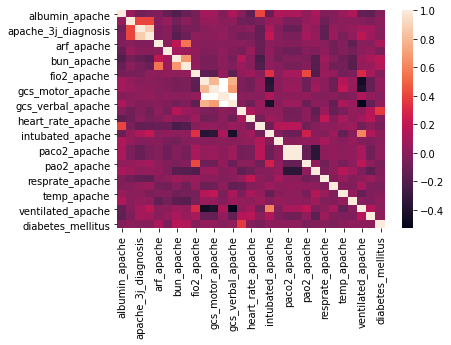

In [310]:
sns.heatmap(norm_covariate.corr())

##APACHE_covariate EDA

In [ ]:
dabl.plot(norm_covariate, 'diabetes_mellitus')

#Analysis of APACHE_comorbidity Data

,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.000700,0.017240,0.014260,0.024200,0.007320,0.004320,0.019960,0.500000
std,0.026449,0.130166,0.118562,0.153671,0.085244,0.065585,0.139864,0.500005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


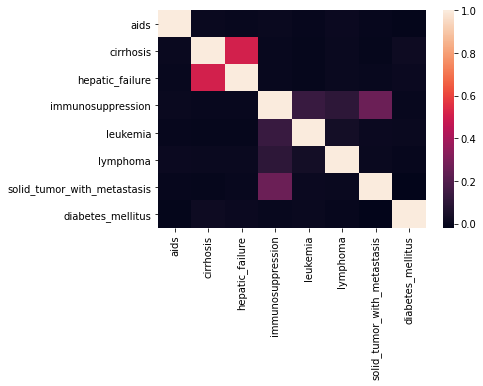

In [312]:
#Correleation for APACHE_comorbidity category    
sns.heatmap(sample[APACHE_comorbidity ].corr());
sample[APACHE_comorbidity ].describe()

##APACHE_comorbidity appear not to correlate to the target variable.  Drop category from sample dataset

In [314]:
APACHE_comorbidity

['aids',
 'cirrhosis',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

In [315]:

sample=sample.drop(APACHE_comorbidity, axis=1)

In [316]:
sample.shape

(50000, 132)

#Final Sample for cleaning

In [318]:
final_sample = sample 

/usr/local/lib/python3.6/dist-packages/dabl/plot/supervised.py:540: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 126 continuous features
Linear Discriminant Analysis training set score: 0.738


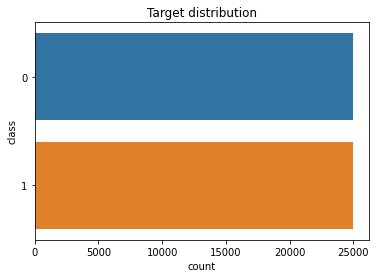

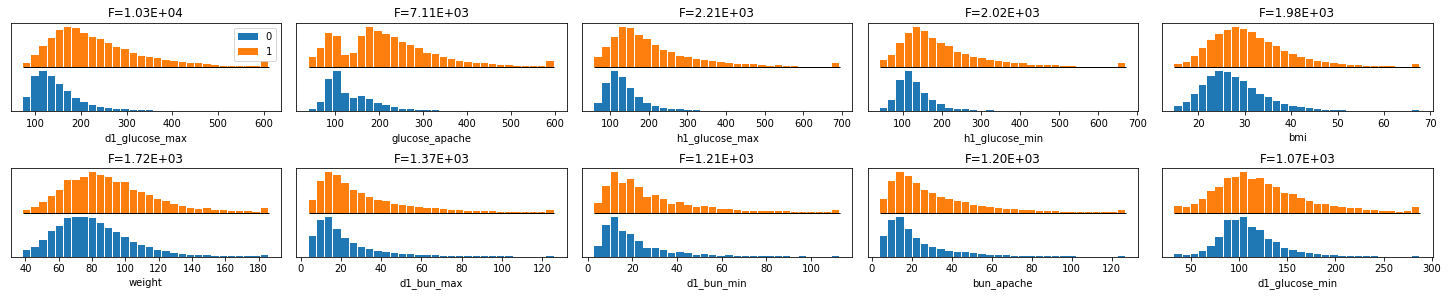

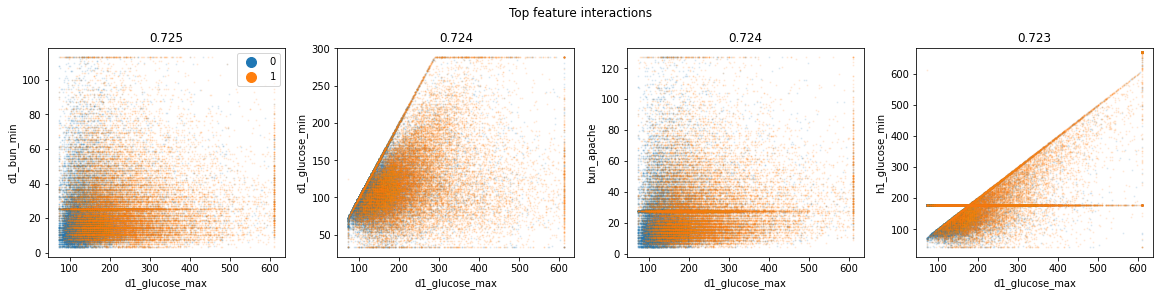

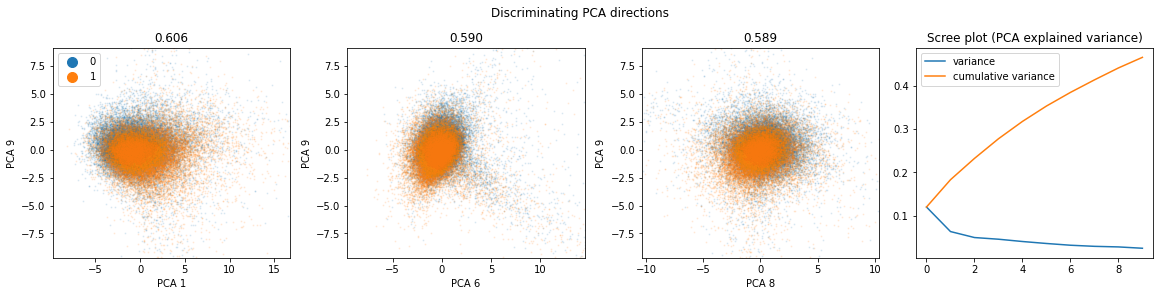

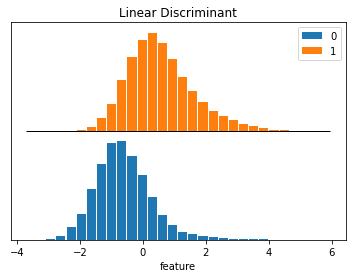

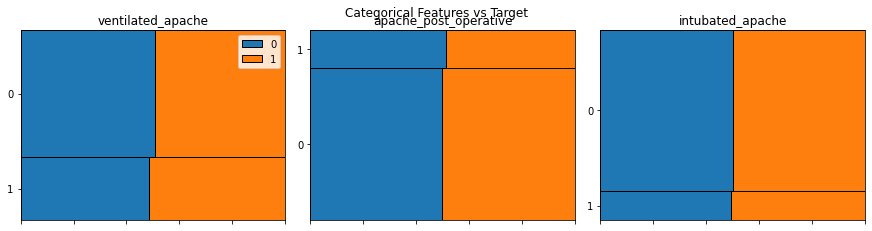

In [319]:
dabl.plot(final_sample,'diabetes_mellitus')